<a href="https://colab.research.google.com/github/sanjay2097/airbnb-analysis/blob/main/Airbnb_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

**Airbnb Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')


**Preliminary Analysis**

In [84]:
#Checcking the info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can see that we are provided with 16 column of different attributes in the dataset containing around 48895 records

In [85]:
#Checking first few records to get familiar with dataset 
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Handling Missing Values**

In [86]:
#Looking at the head of the dataset we already were able to notice some NaN values
#Therefore need to examine missing values further before continuing with analysis

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

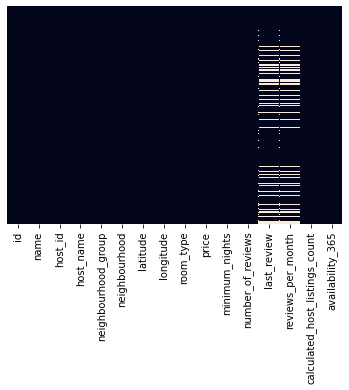

In [6]:
#Heatpmap of missing or NAN values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

All missing values are concentrated in 'last_review' and 'reviews_per_month' columns

In [87]:
#Replacing null values with 0

df.fillna({'reviews_per_month':0}, inplace=True)

#Removing last review and name column since its not relevant to our analysis 
df.drop('last_review',inplace=True,axis=1)
df.drop('name',inplace=True,axis=1)

#Removing records where host name is null
df = df[df['host_name'].notna()]

df.isnull().sum()

id                                0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [88]:
#Counting and removing records where prices are 0 since rented price cannot be null
l_count = df['price'] ==0
print(f'Total records removed {len(df["price"][l_count])}')
df = df[df['price'] !=0]

Total records removed 11


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48863 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48863 non-null  int64  
 1   host_id                         48863 non-null  int64  
 2   host_name                       48863 non-null  object 
 3   neighbourhood_group             48863 non-null  object 
 4   neighbourhood                   48863 non-null  object 
 5   latitude                        48863 non-null  float64
 6   longitude                       48863 non-null  float64
 7   room_type                       48863 non-null  object 
 8   price                           48863 non-null  int64  
 9   minimum_nights                  48863 non-null  int64  
 10  number_of_reviews               48863 non-null  int64  
 11  reviews_per_month               48863 non-null  float64
 12  calculated_host_listings_count  

Total 32 records and 2 obsolete columns have been deleted from our dataset

In [70]:
#Checking for duplicated values
df.duplicated().sum()

0

In [10]:
# Checking available datatype 
df.dtypes

id                                  int64
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [11]:
# Analysing variables with numeric datatype
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.886300e+04,4.886300e+04,48863.000000,48863.000000,48863.000000,48863.000000,48863.000000,48863.000000,48863.000000,48863.000000
mean,1.901953e+07,6.762359e+07,40.728949,-73.952178,152.773018,7.031312,23.263881,1.090676,7.147105,112.791928
std,1.098439e+07,7.861985e+07,0.054530,0.046158,240.215830,20.516099,44.545076,1.597049,32.963046,131.624918
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.473569e+06,7.819574e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967722e+07,3.079133e+07,40.723070,-73.955690,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915679e+07,1.074344e+08,40.763115,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The standard deviation in very large for quite a few variables.
This shows that there is huge variation in records of particular columns

In [ ]:
#Replacing values where minimum night is greater than 90 in airbnb database

df.loc[df['minimum_nights'] > 90, 'minimum_nights'] = 90

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.886300e+04,4.886300e+04,48863.000000,48863.000000,48863.000000,48863.000000,48863.000000,48863.000000,48863.000000,48863.000000
mean,1.901953e+07,6.762359e+07,40.728949,-73.952178,152.773018,6.451303,23.263881,1.090676,7.147105,112.791928
std,1.098439e+07,7.861985e+07,0.054530,0.046158,240.215830,11.177606,44.545076,1.597049,32.963046,131.624918
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.473569e+06,7.819574e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967722e+07,3.079133e+07,40.723070,-73.955690,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915679e+07,1.074344e+08,40.763115,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,90.000000,629.000000,58.500000,327.000000,365.000000


**Geospatial Visualization**

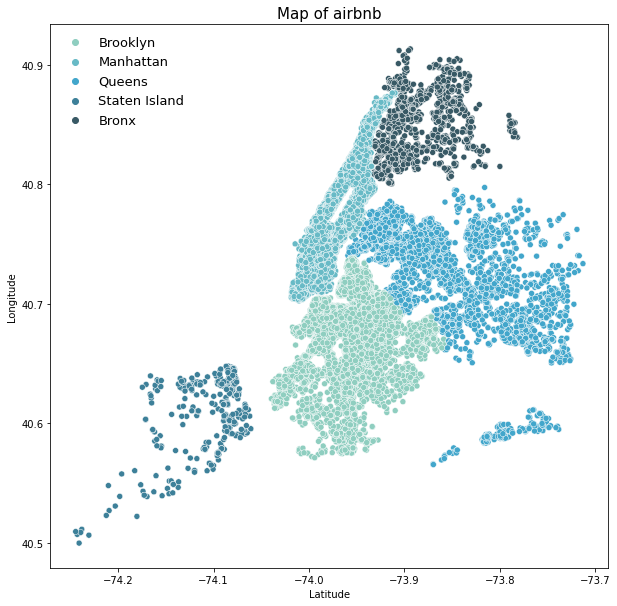

In [12]:
# Visualisation - Map of hosts

plt.figure(figsize=(10,10))
a = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='GnBu_d')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

**Analysis with cleaned dataset**

In [13]:
#Creating new dataframe with important columns for our analysis

als = df[['host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
als.head()

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [14]:
als.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48863 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48863 non-null  int64  
 1   host_name                       48863 non-null  object 
 2   neighbourhood_group             48863 non-null  object 
 3   neighbourhood                   48863 non-null  object 
 4   room_type                       48863 non-null  object 
 5   price                           48863 non-null  int64  
 6   minimum_nights                  48863 non-null  int64  
 7   number_of_reviews               48863 non-null  int64  
 8   reviews_per_month               48863 non-null  float64
 9   calculated_host_listings_count  48863 non-null  int64  
 10  availability_365                48863 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 4.5+ MB


**Analyzing the new dataset**

               neighbourhood_group  Percentage
Manhattan                    21651       44.31
Brooklyn                     20086       41.11
Queens                        5664       11.59
Bronx                         1089        2.23
Staten Island                  373        0.76


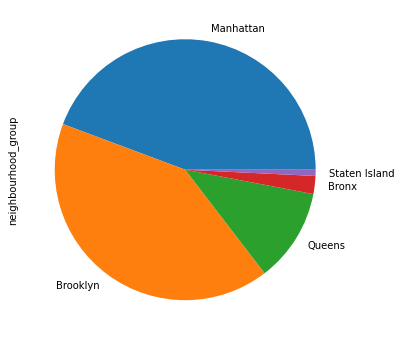

In [94]:
#Analyzing neighbourhood groups
listings_count = pd.DataFrame(als["neighbourhood_group"].value_counts())
#Calculating the percentage of listings in each location
listings_count["Percentage"] = round((listings_count["neighbourhood_group"]/listings_count["neighbourhood_group"].sum())*100,2)
print(listings_count.head())
als.neighbourhood_group.value_counts().plot(kind='pie' , figsize=(6,6))

Based on above statistics, one can conclude that Manhattan has 44% of the total listings followed by Brooklyn 41% in New York.

Hence, we can infer that AirBnB customers have more options in Los Manhattan and possibility of finding an accommodation is high.

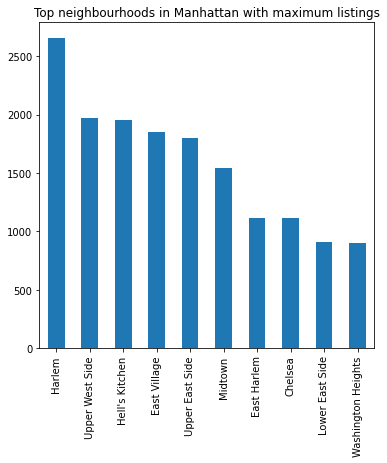

In [103]:
Title = "Top neighbourhoods in Manhattan with maximum listings"

als[als["neighbourhood_group"]=="Manhattan"]["neighbourhood"].value_counts().head(10).plot(kind='bar' , figsize=(6,6) , title=Title)

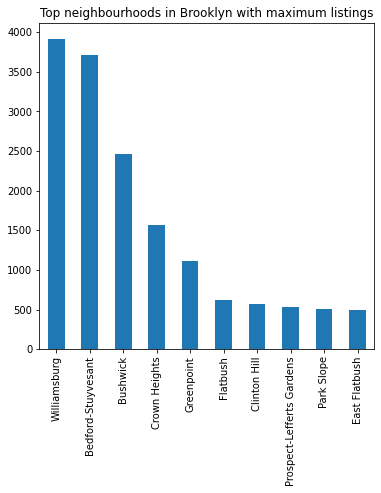

In [101]:
Title = "Top neighbourhoods in Brooklyn with maximum listings"

als[als["neighbourhood_group"]=="Brooklyn"]["neighbourhood"].value_counts().head(10).plot(kind='bar' , figsize=(6,6) , title=Title)

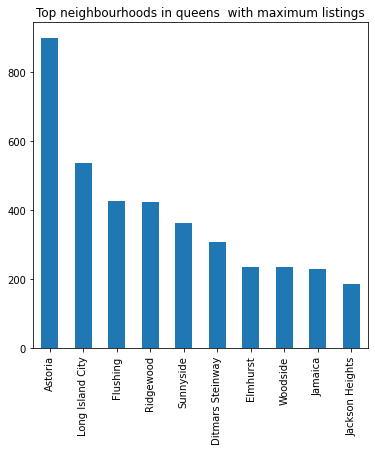

In [104]:
Title = "Top neighbourhoods in queens  with maximum listings"

als[als["neighbourhood_group"]=="Queens"]["neighbourhood"].value_counts().head(10).plot(kind='bar' , figsize=(6,6) , title=Title)

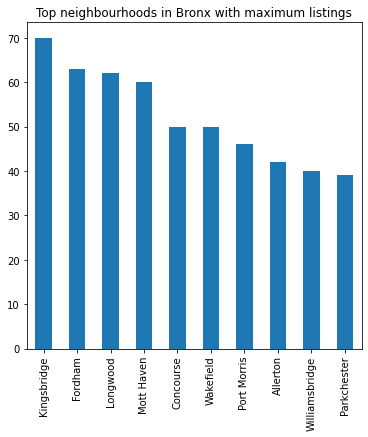

In [105]:
Title = "Top neighbourhoods in Bronx with maximum listings"

als[als["neighbourhood_group"]=="Bronx"]["neighbourhood"].value_counts().head(10).plot(kind='bar' , figsize=(6,6) , title=Title)

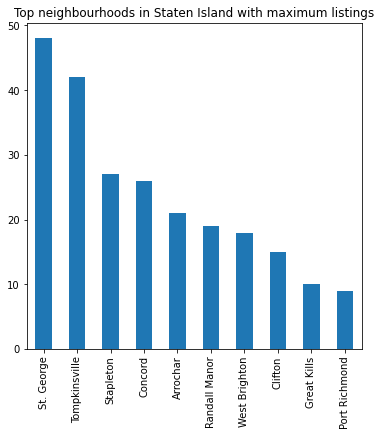

In [106]:
Title = "Top neighbourhoods in Staten Island with maximum listings"

als[als["neighbourhood_group"]=="Staten Island"]["neighbourhood"].value_counts().head(10).plot(kind='bar' , figsize=(6,6) , title=Title)

In [56]:
#Analyzing room types
room_count = pd.DataFrame(als["room_type"].value_counts())
#Calculating the percentage of listings in each location
room_count["Percentage"] = round((room_count["room_type"]/room_count["room_type"].sum())*100,2)
room_count

,room_type,Percentage
Entire home/apt,25398,51.98
Private room,22307,45.65
Shared room,1158,2.37


Entire room/apt have maximum listings around 52% followed by private room with 46% and shared room  have minimum 2%

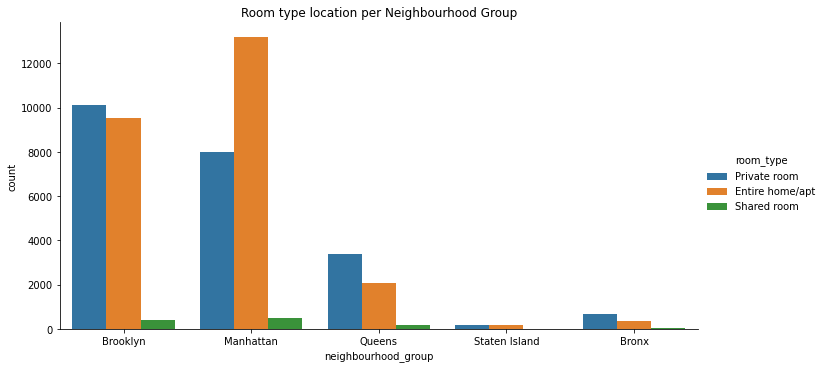

In [63]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='neighbourhood_group', kind="count", hue="room_type", data=als, height=5, aspect=2);
plt.title(title)
plt.ioff()

Geospatial Visualization of top hosts 

In [69]:
import plotly.express as px

## Setting the DataFrame
temp = df.host_id.value_counts().reset_index().head(5)
temp.columns = ['host_id', 'count']
temp = temp.merge(df[['host_id','host_name','price', 'latitude','longitude']], left_on = 'host_id',right_on = 'host_id', how = 'left', copy = False)

## Setting up the Visualization
fig = px.scatter_mapbox(temp, 
                        lat="latitude", 
                        lon="longitude", 
                        color="host_name", 
                        size="price",
                        size_max=30, 
                        opacity = .70,
                        zoom=11,
                       )


fig.layout.mapbox.style = 'carto-positron'
fig.update_layout(title_text = 'Top 5 hosts and their hosted Locations)', height = 800)

fig.show()

In [64]:
#Relationship between neighbourhood groups and prices
#Taking median of price to compensate for high variation 

prices_df = pd.DataFrame(als.groupby(["neighbourhood_group"])['price'].agg(np.median).reset_index().sort_values('price',ascending=False))

prices_df

,neighbourhood_group,price
2,Manhattan,150.0
1,Brooklyn,90.0
3,Queens,75.0
4,Staten Island,75.0
0,Bronx,65.0


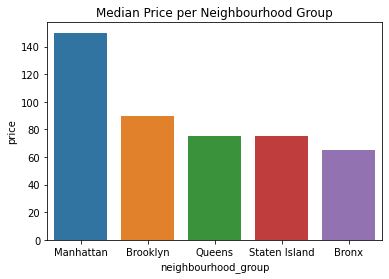

In [65]:
# visualization  

title = 'Median Price per Neighbourhood Group'
sns.barplot(x='neighbourhood_group', y="price", data=prices_df, order=prices_df['neighbourhood_group'])
plt.title(title)
plt.ioff()

In [114]:
#Relationship between neighbourhood and prices
#Taking median of price to compensate for high variation 

prices_df1 = pd.DataFrame(als.groupby(["neighbourhood"])['price'].agg(np.median).nlargest(5).sort_values(ascending=False))

prices_df1

,price
neighbourhood,
Fort Wadsworth,800.0
Woodrow,700.0
Tribeca,295.0
Neponsit,274.0
NoHo,250.0


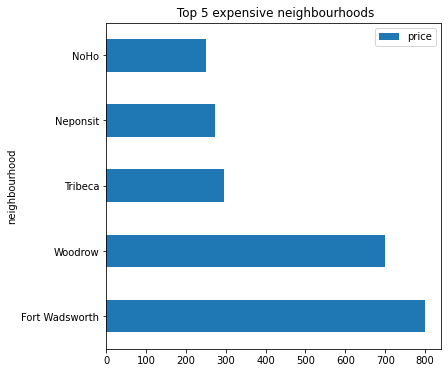

In [124]:
# Visualization
prices_df1.plot(kind = 'barh', title = ' Top 5 expensive neighbourhoods', figsize=(6,6))

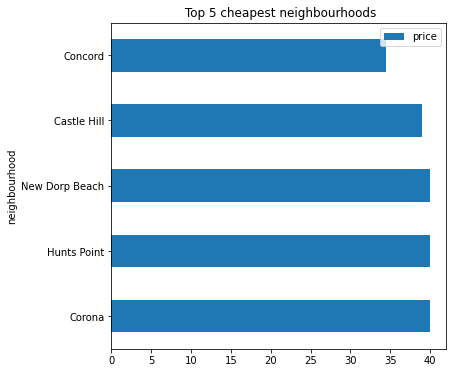

In [123]:
# Vizualization of cheapest neighbourhoods
pd.DataFrame(als.groupby(["neighbourhood"])['price'].agg(np.median).nsmallest(5).sort_values(ascending=False)).plot(
kind = 'barh', title = ' Top 5 cheapest neighbourhoods', figsize=(6,6))

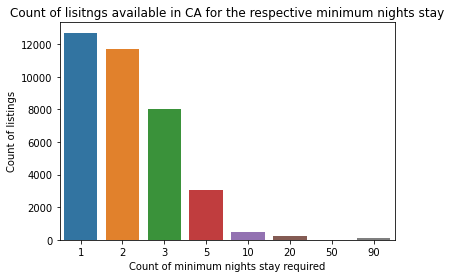

In [71]:
sns.countplot(x=als[als["minimum_nights"].isin([1,2,3,5,10,20,50,90])]["minimum_nights"])
plt.title("Count of lisitngs available in CA for the respective minimum nights stay")
plt.xlabel("Count of minimum nights stay required")
plt.ylabel("Count of listings")
plt.show()

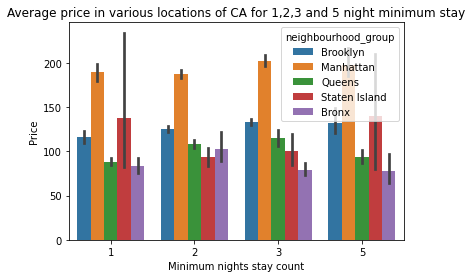

In [152]:
sns.barplot(data=als[(als["minimum_nights"].isin([1,2,3,5]))],x="minimum_nights",y="price", hue = "neighbourhood_group")
plt.title("Average price in various locations of CA for 1,2,3 and 5 night minimum stay")
plt.xlabel("Minimum nights stay count")
plt.ylabel("Price")
plt.show()

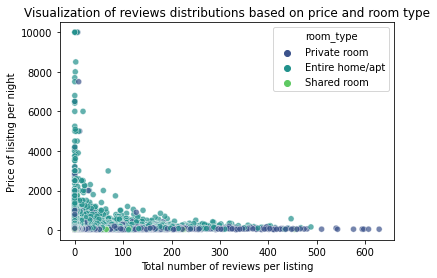

In [153]:
sns.scatterplot(data=als, x="number_of_reviews", y ="price", hue= "room_type" ,palette="viridis",alpha=0.7)
plt.title("Visualization of reviews distributions based on price and room type")
plt.xlabel("Total number of reviews per listing")
plt.ylabel("Price of lisitng per night")
plt.show()

In [151]:
# Top  ten hosts across diffent neighbourhood
busiest_hosts = als.groupby(['host_name','host_id','neighbourhood'])['number_of_reviews'].sum().reset_index().sort_values('number_of_reviews',ascending=False).head(10)

busiest_hosts

,host_name,host_id,neighbourhood,number_of_reviews
25135,Maya,37312959,East Elmhurst,2273
5580,Brooklyn& Breakfast -Len-,344035,Prospect Heights,2205
8792,Danielle,26432133,East Elmhurst,2017
37637,Yasu & Akiko,35524316,Hell's Kitchen,1971
5114,Brady,40176101,Bedford-Stuyvesant,1818
17418,Jj,4734398,Harlem,1798
1194,Alex And Zeena,16677326,Chelsea,1355
30248,Randy,6885157,Bedford-Stuyvesant,1346
2891,Angela,23591164,East Elmhurst,1269
13972,Han,59529529,Hell's Kitchen,1229


In [79]:
#Difference in Traffic by checking availabity throughout the year
available  = als['availability_365']==365
traffic_df = pd.DataFrame(als['neighbourhood_group'][available]).value_counts()

traffic_df

neighbourhood_group
Manhattan              572
Brooklyn               453
Queens                 204
Bronx                   54
Staten Island           12
dtype: int64

Since Manhattan has the most listings available throghout the year it generates highest traffic followed by Brooklyn and Queens.

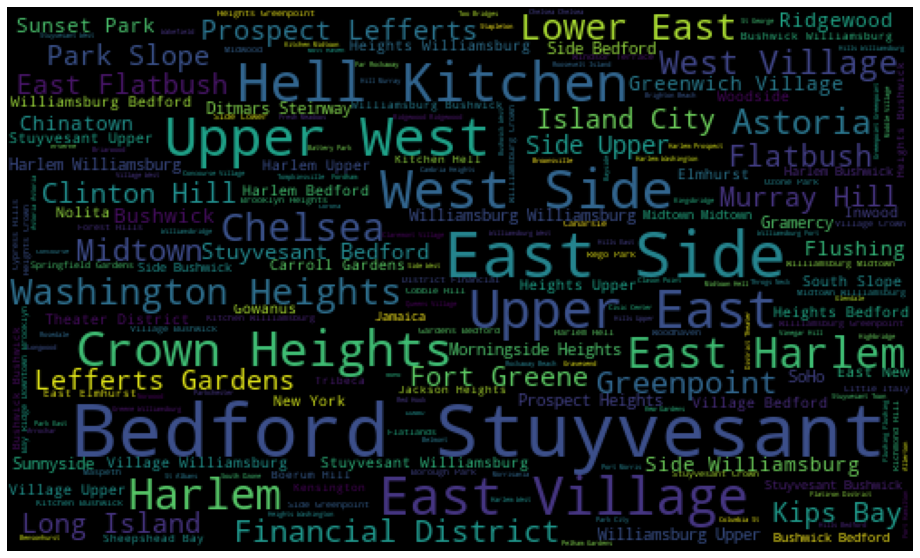

In [129]:
from wordcloud import WordCloud
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(
                          background_color='black',
                          width=500,
                          height=300
                         ).generate(" ".join(als.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

Conclusions from the data analysis:
I used the various data cleaning, data summary and data visualization, geo spatial visualization techniques to analyze the AirBnB listings dataset and found the following summary:

1] Manhattan has nearly 4.7 times the listings when compared to San Francisco.

2] Noticed that the price distribution is righ skewed with very few listings more costly as 5k per night.

3] The highest median price of listings are in Manhattan which is around $150 when compared to the other listings per night.

4] There are a lot of listings available for a minimum stay of 1, 2 as well as 30 days.

5] Majority of the listings are of Entire home and Private room type.

7] Most of the highly reviewed listings are present in Santa Cruz, Los Angeles and San Francisco.

8] Noticed that the most common words used in listing names are 